In [1]:
import pandas as pd
import numpy as np
import geopandas
import shapely.geometry as geom
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Generation of different baselines 

## Naive Pop-Proportion Baseline

In [2]:
ctba_macrozones_data = pd.read_csv('/local/tarciso/data/pesquisa-od-ctba/shapefiles/ctba_macrozones_data.csv')

In [3]:
ctba_macrozones_data

,cod_macrozone,name,area_km2,population,pop_density,pop_proportion
0,1.0,Matriz,35.93,208674,5807.792931,0.110176
1,2.0,Portão,24.37,184437,7568.198605,0.097380
2,3.0,Cajuru,35.76,232563,6503.439597,0.122789
3,4.0,Santa Felicidade,62.22,166525,2676.390228,0.087922
4,5.0,Boa Vista,62.51,268556,4296.208607,0.141793
5,6.0,Boqueirão,39.81,205248,5155.689525,0.108367
6,7.0,Pinheirinho,24.71,151202,6119.061109,0.079832
7,8.0,CIC,63.46,200271,3155.861960,0.105740
8,9.0,Bairro Novo,45.01,163651,3635.880915,0.086405
9,10.0,Tatuquara,41.03,112873,2750.987083,0.059595


In [4]:
orig_macrozones_pop_prop = ctba_macrozones_data.filter(['cod_macrozone','pop_proportion']).add_suffix('_o')
dest_macrozones_pop_prop = ctba_macrozones_data.filter(['cod_macrozone','pop_proportion']).add_suffix('_d')

In [5]:
orig_macrozones_pop_prop

,cod_macrozone_o,pop_proportion_o
0,1.0,0.110176
1,2.0,0.097380
2,3.0,0.122789
3,4.0,0.087922
4,5.0,0.141793
5,6.0,0.108367
6,7.0,0.079832
7,8.0,0.105740
8,9.0,0.086405
9,10.0,0.059595


In [6]:
dest_macrozones_pop_prop

,cod_macrozone_d,pop_proportion_d
0,1.0,0.110176
1,2.0,0.097380
2,3.0,0.122789
3,4.0,0.087922
4,5.0,0.141793
5,6.0,0.108367
6,7.0,0.079832
7,8.0,0.105740
8,9.0,0.086405
9,10.0,0.059595


In [7]:
pop_prop_zones_trips = orig_macrozones_pop_prop.assign(key = 1).merge(dest_macrozones_pop_prop.assign(key = 1), how='outer') \
                                            .assign(prop_trips = lambda x: x.pop_proportion_o * x.pop_proportion_d) \
                                            .filter(['cod_macrozone_o','cod_macrozone_d','prop_trips'])

In [8]:
pop_prop_zones_trips

,cod_macrozone_o,cod_macrozone_d,prop_trips
0,1.0,1.0,0.012139
1,1.0,2.0,0.010729
2,1.0,3.0,0.013528
3,1.0,4.0,0.009687
4,1.0,5.0,0.015622
5,1.0,6.0,0.011940
6,1.0,7.0,0.008796
7,1.0,8.0,0.011650
8,1.0,9.0,0.009520
9,1.0,10.0,0.006566


In [9]:
sum(pop_prop_zones_trips.prop_trips)

1.0

In [10]:
pop_prop_zones_trips.to_csv('/local/tarciso/data/od-mat-validation/trips_od_dataframes/naive_pop_prop_zones_trips.csv',index=False)

In [11]:
pop_prop_baseline_odmat = pop_prop_zones_trips.pivot(index='cod_macrozone_o',columns='cod_macrozone_d',values='prop_trips')

In [12]:
pop_prop_baseline_odmat

cod_macrozone_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozone_o,,,,,,,,,,
1.0,0.012139,0.010729,0.013528,0.009687,0.015622,0.011940,0.008796,0.011650,0.009520,0.006566
2.0,0.010729,0.009483,0.011957,0.008562,0.013808,0.010553,0.007774,0.010297,0.008414,0.005803
3.0,0.013528,0.011957,0.015077,0.010796,0.017411,0.013306,0.009803,0.012984,0.010610,0.007318
4.0,0.009687,0.008562,0.010796,0.007730,0.012467,0.009528,0.007019,0.009297,0.007597,0.005240
5.0,0.015622,0.013808,0.017411,0.012467,0.020105,0.015366,0.011320,0.014993,0.012252,0.008450
6.0,0.011940,0.010553,0.013306,0.009528,0.015366,0.011744,0.008651,0.011459,0.009363,0.006458
7.0,0.008796,0.007774,0.009803,0.007019,0.011320,0.008651,0.006373,0.008441,0.006898,0.004758
8.0,0.011650,0.010297,0.012984,0.009297,0.014993,0.011459,0.008441,0.011181,0.009136,0.006302
9.0,0.009520,0.008414,0.010610,0.007597,0.012252,0.009363,0.006898,0.009136,0.007466,0.005149


In [15]:
np.around(pop_prop_baseline_odmat,3)

cod_macrozone_d,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
cod_macrozone_o,,,,,,,,,,
1.0,0.012,0.011,0.014,0.010,0.016,0.012,0.009,0.012,0.010,0.007
2.0,0.011,0.009,0.012,0.009,0.014,0.011,0.008,0.010,0.008,0.006
3.0,0.014,0.012,0.015,0.011,0.017,0.013,0.010,0.013,0.011,0.007
4.0,0.010,0.009,0.011,0.008,0.012,0.010,0.007,0.009,0.008,0.005
5.0,0.016,0.014,0.017,0.012,0.020,0.015,0.011,0.015,0.012,0.008
6.0,0.012,0.011,0.013,0.010,0.015,0.012,0.009,0.011,0.009,0.006
7.0,0.009,0.008,0.010,0.007,0.011,0.009,0.006,0.008,0.007,0.005
8.0,0.012,0.010,0.013,0.009,0.015,0.011,0.008,0.011,0.009,0.006
9.0,0.010,0.008,0.011,0.008,0.012,0.009,0.007,0.009,0.007,0.005


In [13]:
pop_prop_baseline_odmat.to_csv('/local/tarciso/data/od-mat-validation/od-matrices/pop_prop_naive_baseline_odmat_norm_freqs.csv')

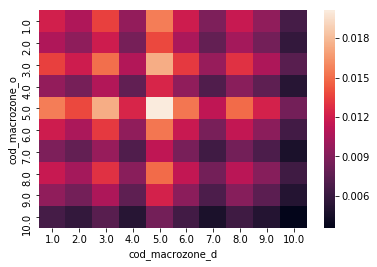

In [14]:
sns.heatmap(pop_prop_baseline_odmat)